In [31]:
from __future__ import absolute_import
from __future__  import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
import os

In [52]:
fights_train = np.zeros((700, 40, 160, 160, 3), dtype=np.float32)
labels_train = []

In [53]:
def capture(filename):
    frames = np.zeros((40, 160, 160, 3), dtype=np.float32)
    i=0
    vc = cv2.VideoCapture(filename)
    if vc.isOpened():
        rval , frame = vc.read()
    else:
        rval = False
    #frm = cv2.resize(frame,(200,200))
    frm = resize(frame,(160, 160, 3))
    frm = np.expand_dims(frm,axis=0)
    if(np.max(frm)>1):
        frm = frm/255.0
    frames[i][:] = frm
    i +=1
    while i < 40:
        rval, frame = vc.read()
        #print(i)
        #plt.imshow(frame)
        #plt.show()
        #frm = cv2.resize(frame,(200,200))
        frm = resize(frame,(160, 160, 3))
        frm = np.expand_dims(frm,axis=0)
        if(np.max(frm)>1):
            frm = frm/255.0
        frames[i][:] = frm
        i +=1
        #print(frame)
    return frames

def cut_save(main_dir,mod):
    i = 0
    fights = np.zeros((399, 40, 200, 200, 3), dtype=np.float32)
    noFights = np.zeros((599, 42, 200, 200, 3), dtype=np.float32)
    for x in os.listdir(main_dir):
        if 1 == 1:
            td = main_dir+x+'/'
            #for y in os.listdir(main_dir+x+'/'):
                #print(y)
            print(x)
            for file in os.listdir(td):
                print(file)
                fl = os.path.join(td, file)
                videos = capture(fl)
                if mod == 'train':
                    fights_train[i][:][:] = videos
                    i +=1
                    if x =='violence':
                        labels_train.append(1)
                    else:
                        labels_train.append(0)
                elif mod =='test':
                    fights_test[i][:][:] = videos
                    i +=1
                    if x =='fights':
                        labels_test.append(1)
                    else:
                        labels_test.append(0)
                elif mod =='val':
                    fights_val[i][:][:] = videos
                    i +=1
                    if x =='fights':
                        labels_val.append(1)
                    else:
                        labels_val.append(0)

In [54]:
labels_train

[]

In [55]:
cut_save('./data/',"train")
print(labels_train)

nonviolence
nonfight.mp4
nonviolence.mp4
nonfight1.mp4
nonviolonce5.mp4
nonfight3.mp4
nonfight2.mp4
nonviolence2.mp4
nonviolence3.mp4
nonviolence4.mp4
violence
violencc.mp4
violence.mp4
fight1.mp4
fight2.mp4
fight3.mp4
fight4.mp4
violence3.mp4
violence2.mp4
violence5.mp4
violence4.mp4
violence6.mp4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [56]:
fights_train.shape

(700, 40, 160, 160, 3)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, fights_test, y_train, labels_test = train_test_split(fights_train,labels_train, test_size=0.33, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [700, 20]

In [58]:
fights_test = []

In [41]:
fights_test= np.zeros((300, 40, 160, 160, 3), dtype=np.float32)
labels_test = []

In [42]:
cut_save('./testm/',"test")

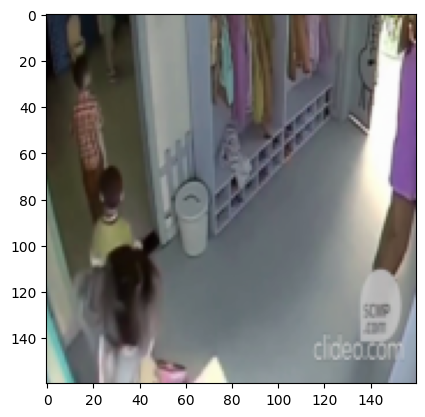

In [57]:
plt.imshow(fights_train[1][1])
plt.show()

In [59]:
layers = tf.keras.layers
models = tf.keras.models
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
utils = tf.keras.utils
callbacks = tf.keras.callbacks
layers = tf.keras.layers
models = tf.keras.models
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
utils = tf.keras.utils
callbacks = tf.keras.callbacks

plot_model = tf.keras.utils.plot_model

In [60]:
np.random.seed(1234)
num_classes = 2

In [61]:
np.random.seed(1234)
num_classes = 2
vg19 = tf.keras.applications.vgg19.VGG19
base_model = vg19(include_top=False,weights='imagenet',input_shape=(160, 160,3))
# Freeze the layers except the last 4 layers
for layer in base_model.layers:
    layer.trainable = False
# Check the trainable status of the individual layers
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 160, 160, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv1 (Conv2D)           │ (None, 160, 160, 64)      │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv2 (Conv2D)           │ (None, 160, 160, 64)      │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 80, 80, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv1 (Conv2D)           │ (None, 80, 80, 128)       │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv2 (Conv2D)           │ (None, 80, 80, 128)       │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 40, 40, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv1 (Conv2D)           │ (None, 40, 40, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv2 (Conv2D)           │ (None, 40, 40, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv3 (Conv2D)           │ (None, 40, 40, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv4 (Conv2D)           │ (None, 40, 40, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 20, 20, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv1 (Conv2D)           │ (None, 20, 20, 512)       │  1,180,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv2 (Conv2D)           │ (None, 20, 20, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv3 (Conv2D)           │ (None, 20, 20, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv4 (Conv2D)           │ (None, 20, 20, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 10, 10, 512)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv1 (Conv2D)           │ (None, 10, 10, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv2 (Conv2D)           │ (None, 10, 10, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv3 (Conv2D)           │ (None, 10, 10, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv4 (Conv2D)           │ (None, 10, 10, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)         │          0 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [65]:
num_classes = 2

cnn = models.Sequential()
cnn.add(base_model)
cnn.add(layers.Flatten())
#cnn.add(layers.Dense(1024, activation='relu'))
#cnn.add(layers.Dropout(0.3))
#cnn.add(layers.Dense(512, activation='relu'))
#cnn.add(layers.Dropout(0.3))
#cnn.add(layers.LSTM(40))

# define LSTM model
model = models.Sequential()

model.add(layers.TimeDistributed(cnn,  input_shape=(40, 160, 160, 3)))
model.add(layers.LSTM(40 , return_sequences=True))

#model.add(layers.Dense(num_classes, activation="sigmoid"))
#model.add(layers.Dropout(0.3))

model.add(layers.TimeDistributed(layers.Dense(160, activation='relu')))

model.add(layers.GlobalAveragePooling1D(name="globale"))

'''
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
'''
model.add(layers.Dense(num_classes, activation="sigmoid" , name="last"))

adam = optimizers.Adam( beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# model.load_weights('mamon98777.hdf5')
rms = optimizers.RMSprop()
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ time_distributed_8              │ ?                         │ 20,024,384 │
│ (TimeDistributed)               │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_4 (LSTM)                   │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ time_distributed_9              │ ?                         │          0 │
│ (TimeDistributed)               │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ globale                         │ ?                         │          0 │
│ (GlobalAveragePooling1D)        │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ last (Dense)                    │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [86]:

class AccuracyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []
        self.loss = []
        self.val_loss = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

history = AccuracyHistory()
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=8,min_delta=1e-5, verbose=0, mode='min')
# mcp_save = callbacks.ModelCheckpoint('/Users/itgl/Documents/school/cv-biedaalt/mamonbest947oscombo.hdfs', save_best_only=True, monitor='val_loss', ,mode='min')
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='val_loss',patience=1, verbose=2,factor=0.5,min_lr=0.0000001)


In [69]:
batch_size =3
epochs = 10

In [70]:
y_train = utils.to_categorical(labels_train)
print(y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [90]:
fights_train.shape

(700, 40, 160, 160, 3)

In [72]:
y_test = utils.to_categorical(labels_train)
print(y_test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [88]:
import time
millis = int(round(time.time() * 1000))
print("started at " , millis)

model.fit(fights_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(fights_test, y_test),callbacks=[earlyStopping, reduce_lr_loss,history])

#0.8995 4

started at  1702576926261


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 700
'y' sizes: 20


In [ ]:
fights_test = []

In [91]:
acc = history.acc
val_acc = history.val_acc
loss = history.loss
val_loss = history.val_loss
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

AttributeError: 'AccuracyHistory' object has no attribute 'acc'

In [ ]:
fights_train = []

In [ ]:
score = model.evaluate(fights_test, y_test, batch_size=3)
score


300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.08618128929287196, 0.98]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
!pip install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [ ]:
Y_pred = model.predict(fights_test , batch_size=1)

ValueError: Exception encountered when calling TimeDistributed.call().

[1mInvalid dtype: NoneType[0m

Arguments received by TimeDistributed.call():
  • inputs=tf.Tensor(shape=(1, None, 40), dtype=float32)
  • training=False
  • mask=None

In [ ]:
yprd = Y_pred > 0.5
yprd

NameError: name 'Y_pred' is not defined

In [ ]:
ypredicted = []
for zero,one in yprd:
    if zero == True:
        ypredicted.append(0)
    else:
        ypredicted.append(1) 

NameError: name 'yprd' is not defined

In [ ]:
ypredicted

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
y = []

for zero,one in y_test:
    if zero == True:
        y.append(0)
    else:
        y.append(1) 

In [ ]:
confusion = confusion_matrix(y,ypredicted)
confusion.shape

(2, 2)

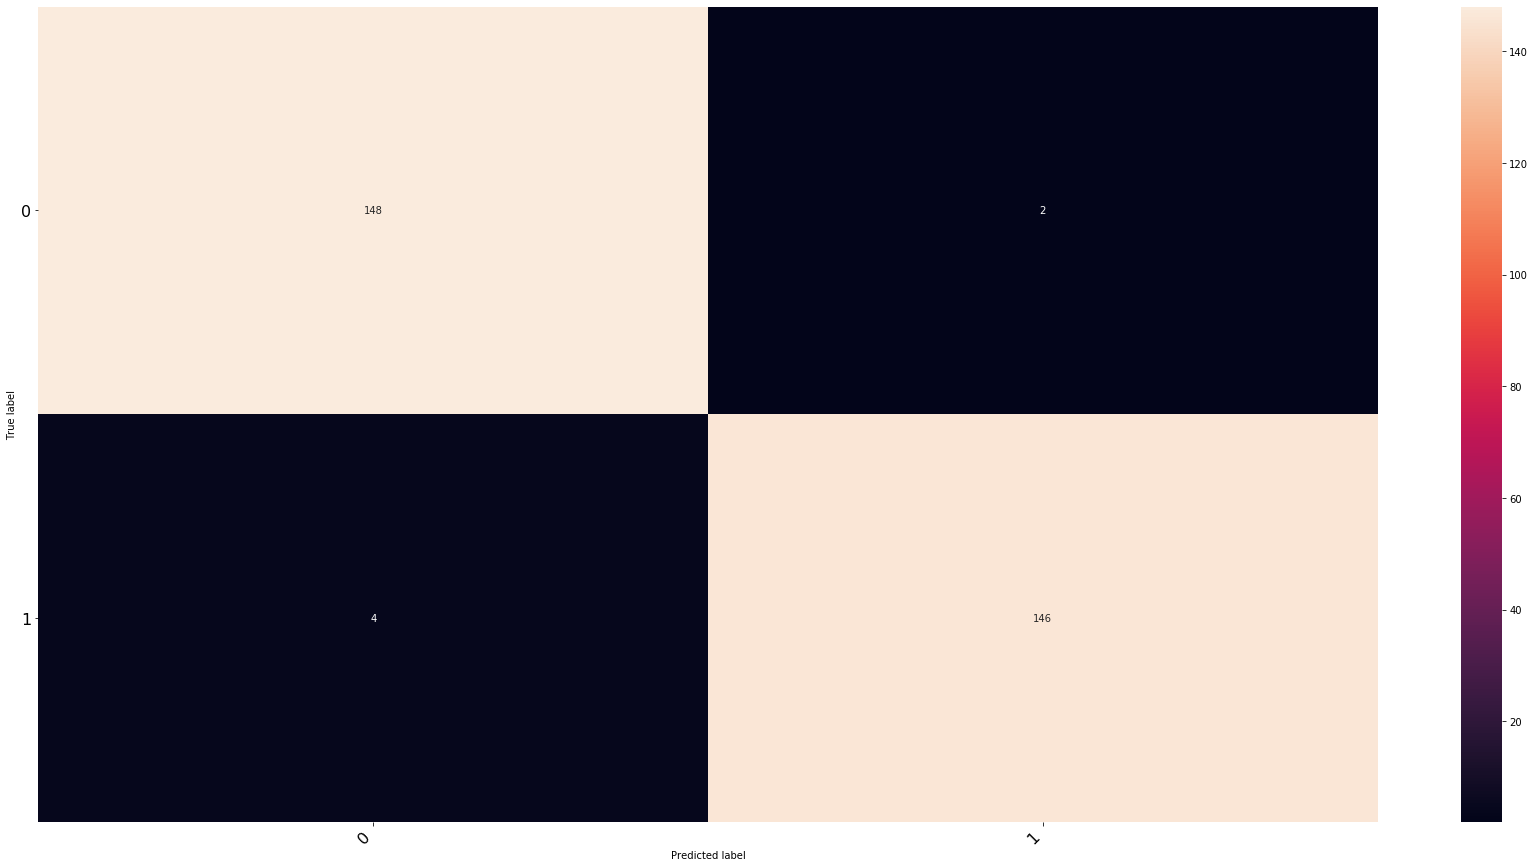

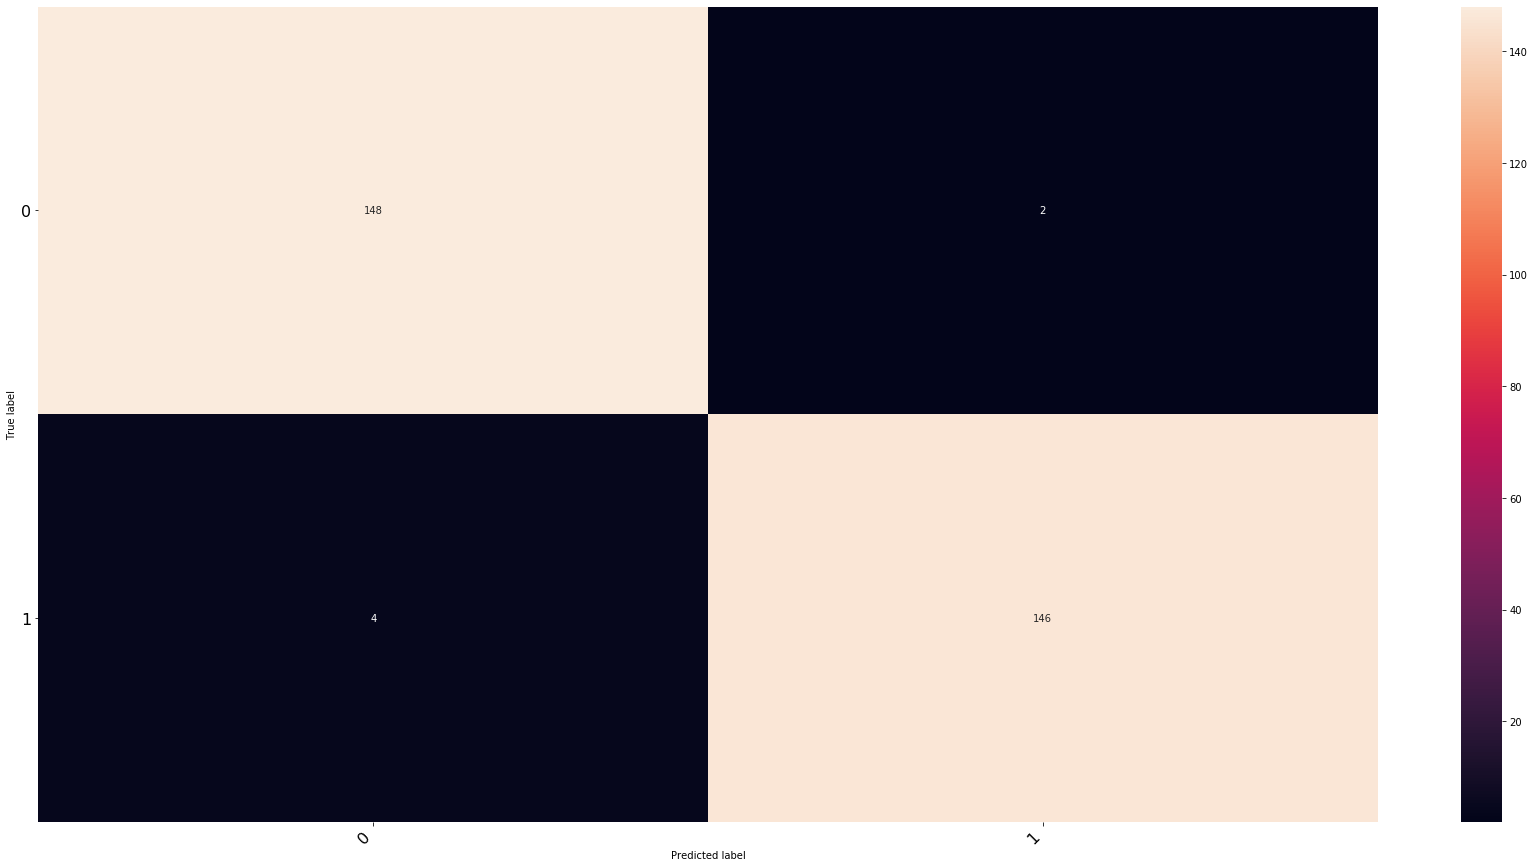

In [ ]:
print_confusion_matrix(confusion, [0,1], figsize = (30,15), fontsize=16)

In [ ]:
print('Classification Report')
print(classification_report(y, ypredicted, target_names=['no-violance','violance']))

Classification Report
              precision    recall  f1-score   support

 no-violance       0.97      0.99      0.98       150
    violance       0.99      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [ ]:
model.save("test.hdfs")